## MODEL DEVELOPMENT

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

RSEED=42

In [2]:
# read the data

data = pd.read_csv('../Notebooks/clean_data.csv')

In [3]:
# preview the data

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,not current,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,not current,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96082,Female,36,0,0,No Info,24.60,4.8,145,0
96083,Female,2,0,0,No Info,17.37,6.5,100,0
96084,Male,66,0,0,not current,27.83,5.7,155,0
96085,Female,24,0,0,not current,35.42,4.0,100,0
96086,Female,57,0,0,current,22.43,6.6,90,0


### Data Transformation

In [5]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# function for data transformation

def transform_data(dataframe, target):
    df = dataframe.drop([target], axis =1)
    
    numerical_features = df.select_dtypes(exclude = "object").columns.to_list()
    categorical_features = df.select_dtypes(include = "object").columns.to_list()
    
    # Transformers
    numerical_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(drop = 'if_binary')
    
    # define column transformer object
    pipeline = ColumnTransformer(
    [
       ( "numerical transformer", numerical_transformer, numerical_features),
        ("categorical transformer", categorical_transformer, categorical_features)
    ])
    
    # apply transformer
    transformed_array = pipeline.fit_transform(df)
    
    # Get the transformed column names
    transformed_numerical_columns = pipeline.transformers_[0][2]
    transformed_categorical_columns = pipeline.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
    
    # Combine numerical and categorical transformed column names
    transformed_column_names = list(transformed_numerical_columns) + list(transformed_categorical_columns)
    
    # convert array to dataframe
    transformed_data = pd.DataFrame(transformed_array, columns=transformed_column_names)
    
    
    # attach target feature
    transformed_data[target] = dataframe[target]
    
    return transformed_data

In [7]:
# perform data transformation using the function

# transform data
transformed_data = transform_data(dataframe=data, target="diabetes")
transformed_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_not current,diabetes
0,1.000,0.0,1.0,0.177171,0.563636,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.675,0.0,0.0,0.202031,0.563636,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.350,0.0,0.0,0.202031,0.400000,0.354545,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.450,0.0,0.0,0.156863,0.272727,0.340909,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


#### Developing the models

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

- random forest
- knn
- decision tree
- logistics regression
- xgb

In [9]:
# function for modelling

def model_funct(data_frame, target):
    #split data into X and y
    X = data_frame.drop([target],axis = 1)
    y = data_frame[target]

    # Assuming X and y into train and test, add stratify = y_data to make sure the imbalance nature of target is considered
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED, stratify=y)


    # Define classifiers
    classifiers = {
        'Logistics Regression': LogisticRegression(),
        'Decision tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'K-Nearest Neighbor' : KNeighborsClassifier(),
        'XGBoost': XGBClassifier()
    }

    # FIT models
    for classifier_name, classifier in classifiers.items():
        precision = []
        recall = []
        accuracy = []
        f1 = []
        print(f"\nResults for {classifier_name}:\n")

        # Train the classifier
        clss = classifier
        clss.fit(X_train, y_train)

        # Make predictions on Train
        y_train_pred = clss.predict(X_train)

        # Make predictions on Test
        y_pred = clss.predict(X_test)

        # Train info: Calculate and print metrics
        Train_accuracy = accuracy_score(y_train, y_train_pred)
        Train_precision = precision_score(y_train, y_train_pred)
        Train_recall = recall_score(y_train, y_train_pred)
        Train_f1 = f1_score(y_train, y_train_pred)


        # Test info: Calculate and print metrics
        Test_accuracy = accuracy_score(y_test, y_pred)
        Test_precision = precision_score(y_test, y_pred)
        Test_recall = recall_score(y_test, y_pred)
        Test_f1 = f1_score(y_test, y_pred)

        # print train result
        print(f"\n Results from Train:")
        print(f"Accuracy: {Train_accuracy:.4f}")
        
        print(f"Precision: {Train_precision:.4f}")
        print(f"Recall: {Train_recall:.4f}")
        print(f"F1 Score: {Train_f1:.4f}")

        # print test result
        print(f"\n Results from Test:")
        print(f"Accuracy: {Test_accuracy:.4f}")
        print(f"Precision: {Test_precision:.4f}")
        print(f"Recall: {Test_recall:.4f}")
        print(f"F1 Score: {Test_f1:.4f}")

In [10]:
model_funct(data_frame= transformed_data, target="diabetes")


Results for Logistics Regression:


 Results from Train:
Accuracy: 0.9588
Precision: 0.8729
Recall: 0.6237
F1 Score: 0.7276

 Results from Test:
Accuracy: 0.9590
Precision: 0.8642
Recall: 0.6352
F1 Score: 0.7322

Results for Decision tree:


 Results from Train:
Accuracy: 0.9990
Precision: 0.9998
Recall: 0.9892
F1 Score: 0.9945

 Results from Test:
Accuracy: 0.9504
Precision: 0.7068
Recall: 0.7484
F1 Score: 0.7270

Results for Random Forest:


 Results from Train:
Accuracy: 0.9990
Precision: 0.9978
Recall: 0.9911
F1 Score: 0.9944

 Results from Test:
Accuracy: 0.9686
Precision: 0.9339
Recall: 0.6938
F1 Score: 0.7961

Results for K-Nearest Neighbor:


 Results from Train:
Accuracy: 0.9690
Precision: 0.9525
Recall: 0.6827
F1 Score: 0.7953

 Results from Test:
Accuracy: 0.9601
Precision: 0.8812
Recall: 0.6329
F1 Score: 0.7367

Results for XGBoost:


 Results from Train:
Accuracy: 0.9745
Precision: 0.9893
Recall: 0.7184
F1 Score: 0.8324

 Results from Test:
Accuracy: 0.9707
Precision: 0.9

In [ ]:
pip install prettytable

In [13]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define table headers
table.field_names = ["s/n", "ML Algorithm", "Accuracy Score(%)", "Precision Score(%)", "Recall Score(%)", "F1-Score(%)"]

# Add data to the table
table.add_row(["1", "XGB Classifier", 97.07, 95.65, 70.00, 80.84])
table.add_row(["2", "Random Forest", 96.86, 93.39, 69.38, 79.61])
table.add_row(["3", "K-Nearest Neighbors", 96.01, 88.12, 63.29, 73.67])
table.add_row(["4", "Logistic Regression", 95.90, 86.42, 63.52, 73.22])
table.add_row(["5", "Decision Tree", 95.04, 70.68, 74.84, 72.70])

print('Summary of predictions on test set')

# Print the table
print(table)

Summary of predictions on test set
+-----+---------------------+-------------------+--------------------+-----------------+-------------+
| s/n |     ML Algorithm    | Accuracy Score(%) | Precision Score(%) | Recall Score(%) | F1-Score(%) |
+-----+---------------------+-------------------+--------------------+-----------------+-------------+
|  1  |    XGB Classifier   |       97.07       |       95.65        |       70.0      |    80.84    |
|  2  |    Random Forest    |       96.86       |       93.39        |      69.38      |    79.61    |
|  3  | K-Nearest Neighbors |       96.01       |       88.12        |      63.29      |    73.67    |
|  4  | Logistic Regression |        95.9       |       86.42        |      63.52      |    73.22    |
|  5  |    Decision Tree    |       95.04       |       70.68        |      74.84      |     72.7    |
+-----+---------------------+-------------------+--------------------+-----------------+-------------+


**Key Observations**
- `XGB Classifier:` This model has the **best accuracy and precision**, but its recall is moderate. It performs well overall but may miss some positive cases.


- `Random Forest:` Similar to XGB, it shows strong accuracy and precision but slightly lower recall, indicating potential issues detecting all positive instances.


- `K-Nearest Neighbors:` KNN's recall is the lowest among top models, suggesting it may struggle with identifying positive classes compared to others.


- `Logistic Regression:` Solid accuracy but lower precision and recall, implying it might not be as reliable in handling class imbalances.


- `Decision Tree:` It has the lowest accuracy and precision but the highest recall, meaning it captures positive cases better but at the cost of more false positives.

### Optimizing XG Boost to improve its Recall

In [16]:
# Print the hyperparameters
print(XGBClassifier().get_params())


{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
# function for optimization

def optimization_funct(data, target, param_dict = {}):
    # Split data into X and y
    X_data = data.drop([target], axis=1)
    y_data = data[target]

    # Split data into train and final test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=RSEED, stratify=y_data)

    # Split the training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=RSEED, stratify=y_train_val)
    # Resulting in 60% train, 20% validation, 20% test

    # Initialize classifier
    clf = XGBClassifier(**param_dict)

    # Fit to data using validation set for eval_set
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=50)
    
    # Plot the log loss for training and validation sets
    evals_result = clf.evals_result()
    epochs = len(evals_result['validation_0']['logloss'])
    x_axis = range(0, epochs)

    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, evals_result['validation_0']['logloss'], label='Train Log Loss')
    plt.plot(x_axis, evals_result['validation_1']['logloss'], label='Validation Log Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss Over Boosting Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Predict on train and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    # Predict on the separate test data
    y_test_pred = clf.predict(X_test)

    predict_dict = {
        "train": [y_train, y_train_pred],
        "validation": [y_val, y_val_pred],
        "test": [y_test, y_test_pred]
    }
    
    # print out the final train, test and evaluation result
    for key, value in predict_dict.items():
        print(f"Results for {key}")
        print(f"{key} accuracy = {accuracy_score(value[0], value[1]):.4f}")
        print(f"{key} precision = {precision_score(value[0], value[1]):.4f}")
        print(f"{key} recall = {recall_score(value[0], value[1]):.4f}")
        print(f"{key} f1 = {f1_score(value[0], value[1]):.4f}")
        print("------------------------------------------")


[0]	validation_0-logloss:0.21217	validation_1-logloss:0.21324
[50]	validation_0-logloss:0.07161	validation_1-logloss:0.08522
[99]	validation_0-logloss:0.06124	validation_1-logloss:0.08917


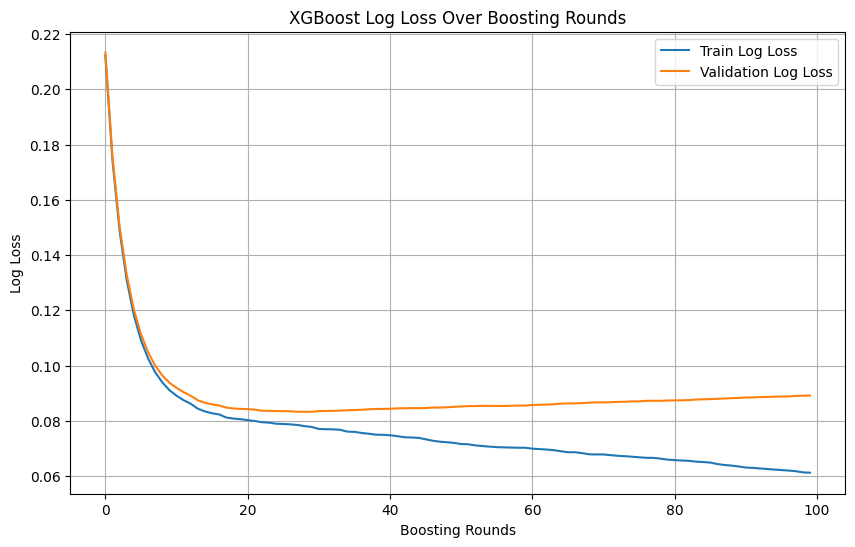

Results for train
train accuracy = 0.9757
train precision = 0.9876
train recall = 0.7335
train f1 = 0.8418
------------------------------------------
Results for validation
validation accuracy = 0.9694
validation precision = 0.9548
validation recall = 0.6851
validation f1 = 0.7978
------------------------------------------
Results for test
test accuracy = 0.9695
test precision = 0.9397
test recall = 0.6987
test f1 = 0.8015
------------------------------------------


In [15]:
optimization_funct(data= transformed_data, target="diabetes")

The model overfits on default hyperparameters. One way to make the performance better from this point is to reduce the number of estimators.

[0]	validation_0-logloss:0.21217	validation_1-logloss:0.21324
[29]	validation_0-logloss:0.07780	validation_1-logloss:0.08331


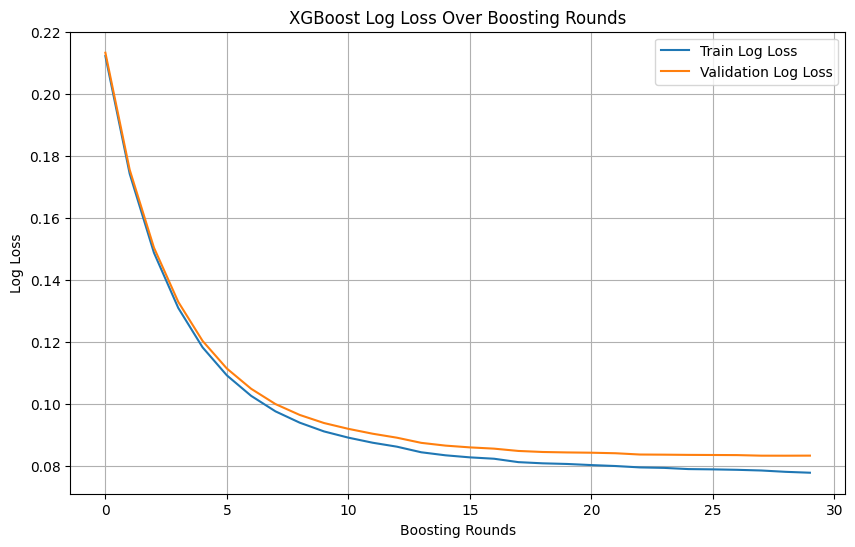

Results for train
train accuracy = 0.9713
train precision = 0.9867
train recall = 0.6844
train f1 = 0.8082
------------------------------------------
Results for validation
validation accuracy = 0.9701
validation precision = 0.9787
validation recall = 0.6757
validation f1 = 0.7994
------------------------------------------
Results for test
test accuracy = 0.9715
test precision = 0.9816
test recall = 0.6904
test f1 = 0.8107
------------------------------------------


In [17]:
# using 30 estimators
optimization_funct(data= transformed_data, target="diabetes", param_dict={"n_estimators": 30})

The accuracy and precision are better but the recall is poor. Class weight adjustment is a possible solution to the imbalance

[0]	validation_0-logloss:0.31589	validation_1-logloss:0.31631
[29]	validation_0-logloss:0.10616	validation_1-logloss:0.11022


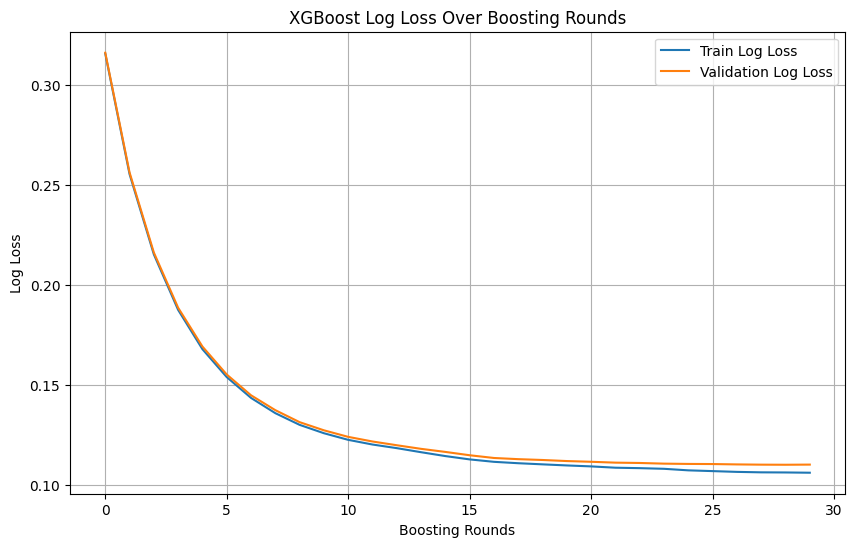

Results for train
train accuracy = 0.9571
train precision = 0.7252
train recall = 0.8273
train f1 = 0.7729
------------------------------------------
Results for validation
validation accuracy = 0.9557
validation precision = 0.7238
validation recall = 0.8048
validation f1 = 0.7621
------------------------------------------
Results for test
test accuracy = 0.9545
test precision = 0.7121
test recall = 0.8125
test f1 = 0.7590
------------------------------------------


In [18]:
optimization_funct(data= transformed_data, target="diabetes", param_dict={"n_estimators": 30, "scale_pos_weight": 4 })

Using GridSerchCV to get the best parameters

In [ ]:
# function to perform grid search

def grid_search_funct(data, target, param_grid):
    
    # split data to train, test and evaluation set
    X_data = data.drop([target], axis=1)
    y_data = data[target]
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=RSEED, stratify=y_data)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=RSEED, stratify=y_train_val)

    

    # Instantiate XGBoost model
    xgb = XGBClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=3, verbose=2, n_jobs=-1)

    # Train grid search
    grid_search.fit(X_train, y_train)

    # Return the best parameters
    return grid_search.best_params_

In [24]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [30, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    "scale_pos_weight": [4]
}

In [25]:
best_param = grid_search_funct(data= transformed_data, target="diabetes", param_grid=param_grid)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=30, scale_pos_weight=4, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, scale_pos_weight=4, subsample=0.8; total time=   0.2s

In [26]:
best_param

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'scale_pos_weight': 4,
 'subsample': 1.0}

[0]	validation_0-logloss:0.35624	validation_1-logloss:0.35673
[50]	validation_0-logloss:0.11124	validation_1-logloss:0.11311
[99]	validation_0-logloss:0.10686	validation_1-logloss:0.11032


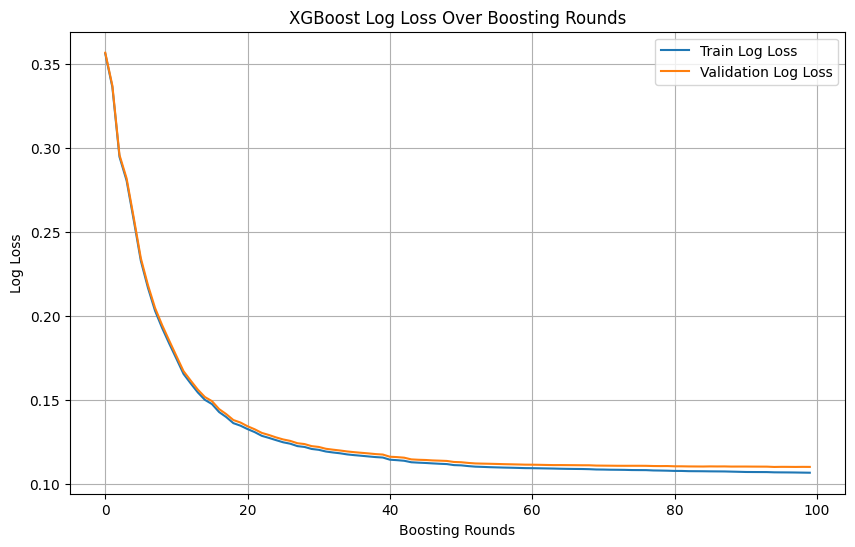

Results for train
train accuracy = 0.9560
train precision = 0.7182
train recall = 0.8247
train f1 = 0.7678
------------------------------------------
Results for validation
validation accuracy = 0.9546
validation precision = 0.7171
validation recall = 0.8025
validation f1 = 0.7574
------------------------------------------
Results for test
test accuracy = 0.9543
test precision = 0.7118
test recall = 0.8096
test f1 = 0.7575
------------------------------------------


In [27]:
optimization_funct(data= transformed_data, target="diabetes", param_dict=best_param)

### Final model training and feature importance with best hyperparameters

In [28]:
best_param = {'colsample_bytree': 0.8,
                     'learning_rate': 0.2,
                     'max_depth': 3,
                     'n_estimators': 100,
                     'scale_pos_weight': 4,
                     'subsample': 1.0}

In [30]:
def final_model(data, target, param_dict = {}):
    # Split data into X and y
    X = data.drop([target], axis=1)
    y = data[target]

    # Split data into train and final test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED, stratify=y)

    # Initialize classifier
    xgb = XGBClassifier(**param_dict)

    # Train the model
    xgb.fit(X_train, y_train)

    # Extract feature importance
    feature_importances = xgb.feature_importances_

    # Create a DataFrame to hold feature importances
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

    return importance_df, xgb

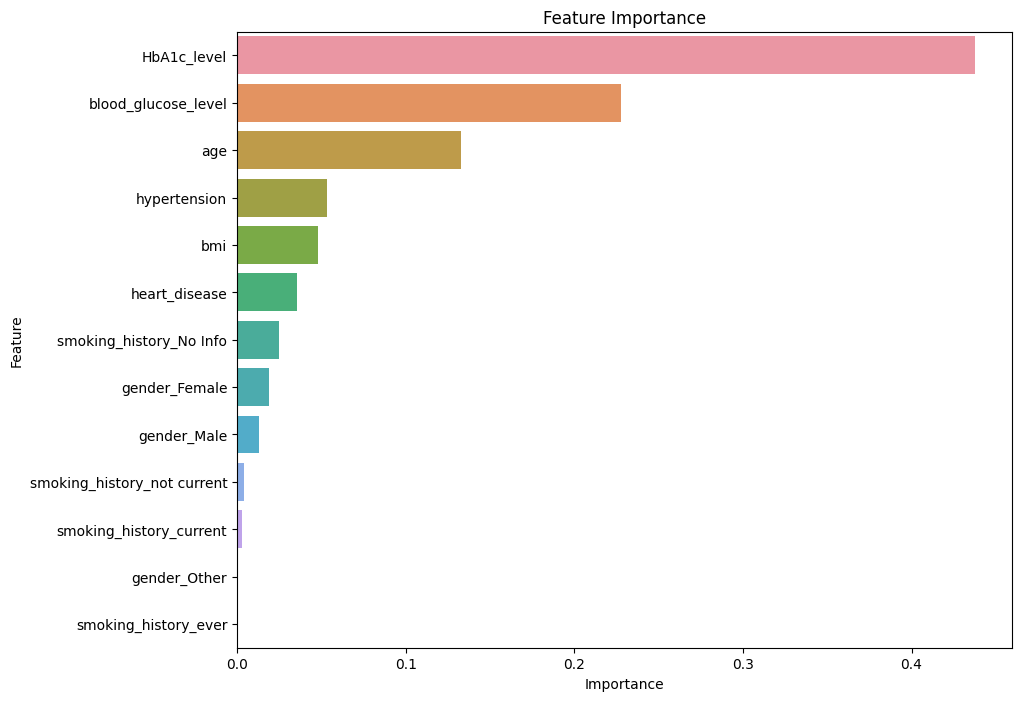

In [31]:
feature_importance, model = final_model(data= transformed_data, target="diabetes", param_dict=best_param)

In [32]:
# display features in the order of importance

feature_importance

,Feature,Importance
4,HbA1c_level,0.437725
5,blood_glucose_level,0.227953
0,age,0.132844
1,hypertension,0.053409
3,bmi,0.047731
2,heart_disease,0.035663
9,smoking_history_No Info,0.025043
6,gender_Female,0.018794
7,gender_Male,0.013320
12,smoking_history_not current,0.004376


**ORDER OF IMPORTANCE**

**Top Important:**
`HbA1c_level`, `blood_glucose_level` and `age`

**Moderately Important:**
`Hypertension`, `bmi`, `heart_disease`, `smoking_history_no info`, `gender_male`and `gender_female`.

**Less Important:**
`smoking_history_not current` and `smoking_history current`

**Not Important:**
`gender_other` and `smoking_history_ever`